In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as skl
import pickle 

In [ ]:
Dataframe_path = "database/csv2.csv" #path to the csv file
data = pd.read_csv(Dataframe_path)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
data.dropna(inplace=True) #drop all the rows with missing values

In [ ]:
from sklearn.model_selection import train_test_split #split the data into training and testing data

if(Dataframe_path == "database/csv2.csv"):
    X = data.drop(['Price', 'Address', 'Type', 'Method', 'SellerG', 'Car', 'Lattitude', 'Longtitude'], axis=1) #drop the columns that are not needed
    Y = data['Price'] #set the target variable

X.head()

,Suburb,Rooms,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,2,4/02/2016,2.5,3067.0,2.0,1.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,4/03/2017,2.5,3067.0,3.0,2.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
6,Abbotsford,4,4/06/2016,2.5,3067.0,3.0,1.0,120.0,142.0,2014.0,Yarra City Council,Northern Metropolitan,4019.0
11,Abbotsford,3,7/05/2016,2.5,3067.0,4.0,2.0,245.0,210.0,1910.0,Yarra City Council,Northern Metropolitan,4019.0
14,Abbotsford,2,8/10/2016,2.5,3067.0,2.0,1.0,256.0,107.0,1890.0,Yarra City Council,Northern Metropolitan,4019.0


In [ ]:
X = pd.get_dummies(X) #convert the categorical variables into dummy/indicator variables
X

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Propertycount,Suburb_Abbotsford,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,3067.0,2.0,1.0,156.0,79.0,1900.0,4019.0,True,...,True,False,False,False,True,False,False,False,False,False
4,3,2.5,3067.0,3.0,2.0,134.0,150.0,1900.0,4019.0,True,...,True,False,False,False,True,False,False,False,False,False
6,4,2.5,3067.0,3.0,1.0,120.0,142.0,2014.0,4019.0,True,...,True,False,False,False,True,False,False,False,False,False
11,3,2.5,3067.0,4.0,2.0,245.0,210.0,1910.0,4019.0,True,...,True,False,False,False,True,False,False,False,False,False
14,2,2.5,3067.0,2.0,1.0,256.0,107.0,1890.0,4019.0,True,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,25.5,3750.0,3.0,2.0,383.0,118.0,2016.0,2940.0,False,...,False,False,False,False,True,False,False,False,False,False
34849,3,25.5,3750.0,3.0,2.0,404.0,158.0,2012.0,2940.0,False,...,False,False,False,False,True,False,False,False,False,False
34853,2,6.3,3013.0,2.0,2.0,98.0,104.0,2018.0,6543.0,False,...,False,False,False,False,False,False,False,False,True,False
34854,2,6.3,3013.0,2.0,1.0,220.0,120.0,2000.0,6543.0,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #split the data into training and testing data

In [ ]:
train_data = X_train.join(Y_train) #join the training data
train_data.head(10)  

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Propertycount,Suburb_Abbotsford,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
28654,3,13.1,3060.0,3.0,1.0,589.0,97.0,1960.0,5070.0,False,...,False,False,False,True,False,False,False,False,False,600000.0
25139,4,18.4,3029.0,4.0,2.0,690.0,171.0,1995.0,13830.0,False,...,False,False,False,False,False,False,False,True,False,660000.0
14672,4,7.0,3071.0,4.0,3.0,530.0,251.0,2016.0,8870.0,False,...,False,False,False,True,False,False,False,False,False,2070000.0
590,3,5.9,3032.0,3.0,1.0,452.0,175.0,1960.0,6567.0,False,...,False,False,False,False,False,False,False,True,False,1215000.0
27956,4,20.0,3194.0,4.0,3.0,652.0,288.0,1960.0,6162.0,False,...,False,False,False,False,False,True,False,False,False,1460000.0
1801,3,11.2,3186.0,3.0,2.0,0.0,111.0,1980.0,10579.0,False,...,False,False,False,False,False,False,True,False,False,1650000.0
13436,2,3.8,3207.0,2.0,2.0,0.0,90.0,2012.0,8648.0,False,...,False,False,False,False,False,False,True,False,False,801000.0
7006,3,14.6,3189.0,3.0,1.0,698.0,114.0,1960.0,2555.0,False,...,False,False,False,False,False,False,True,False,False,890000.0
17265,2,2.4,3121.0,2.0,1.0,135.0,87.0,1890.0,14949.0,False,...,False,False,False,True,False,False,False,False,False,1341000.0
10845,3,15.0,3085.0,3.0,1.0,687.0,122.0,1978.0,1369.0,False,...,False,False,False,True,False,False,False,False,False,721000.0


In [ ]:
from sklearn.preprocessing import StandardScaler #scale the data

scaler = StandardScaler() #create a StandardScaler object

if(Dataframe_path == "database/csv2.csv"):
    x_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price'] #split the training data into features and target variable

x_train_s = scaler.fit_transform(x_train) #fit and transform the training data

In [ ]:
test_data = X_test.join(Y_test) #join the testing data

if(Dataframe_path == "database/csv2.csv"):
    X_test, Y_test = test_data.drop(['Price'], axis=1), test_data['Price'] #split the testing data into features and target variable

test_data.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,BuildingArea,YearBuilt,Propertycount,Suburb_Abbotsford,...,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
9269,3,3.3,3141.0,3.0,2.0,215.0,200.0,1910.0,14887.0,False,...,False,False,False,False,False,False,True,False,False,2695000.0
20281,4,14.7,3030.0,4.0,2.0,720.0,163.0,2001.0,16166.0,False,...,False,False,False,False,False,False,False,True,False,630000.0
17505,4,23.0,3136.0,4.0,2.0,864.0,228.0,2008.0,11925.0,False,...,False,True,False,False,False,False,False,False,False,1120000.0
31840,3,18.4,3029.0,3.0,1.0,537.0,130.0,1985.0,13830.0,False,...,False,False,False,False,False,False,False,True,False,531000.0
18226,1,8.5,3044.0,1.0,1.0,995.0,35.0,1970.0,7485.0,False,...,False,False,False,True,False,False,False,False,False,257500.0


In [ ]:
X_test_s = scaler.fit_transform(X_test) #fit and transform the testing data

In [ ]:
from sklearn.ensemble import RandomForestRegressor #import the RandomForestRegressor

forest_regressor = RandomForestRegressor() #create a RandomForestRegressor object

forest_regressor.fit(x_train_s, y_train) #fit the model

RandomForestRegressor()

In [ ]:
forest_regressor.score(X_test_s, Y_test) #score the model

0.74717056708323

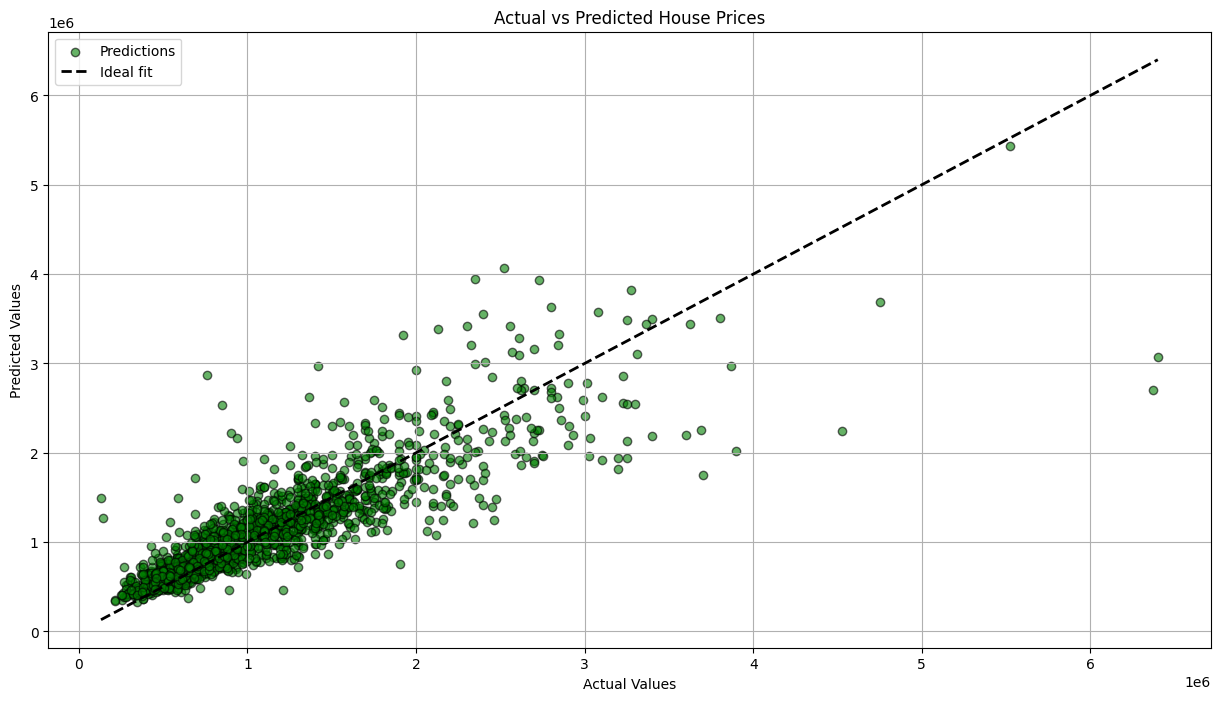

In [ ]:
prediction_forest_regressor = forest_regressor.predict(X_test_s) #predict the target variable using the testing data


plt.figure(figsize=(15, 8)) #plot the actual vs predicted values
plt.scatter(Y_test, prediction_forest_regressor, color='green', edgecolor='k', alpha=0.6, label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, label='Ideal fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for colomn in X.columns: #print the columns in X
    print(colomn)

Rooms
Distance
Postcode
Bedroom2
Bathroom
Landsize
BuildingArea
YearBuilt
Propertycount
Suburb_Abbotsford
Suburb_Aberfeldie
Suburb_Airport West
Suburb_Albanvale
Suburb_Albert Park
Suburb_Albion
Suburb_Alphington
Suburb_Altona
Suburb_Altona Meadows
Suburb_Altona North
Suburb_Ardeer
Suburb_Armadale
Suburb_Ascot Vale
Suburb_Ashburton
Suburb_Ashwood
Suburb_Aspendale
Suburb_Aspendale Gardens
Suburb_Attwood
Suburb_Avondale Heights
Suburb_Bacchus Marsh
Suburb_Balaclava
Suburb_Balwyn
Suburb_Balwyn North
Suburb_Bayswater
Suburb_Bayswater North
Suburb_Beaconsfield
Suburb_Beaconsfield Upper
Suburb_Beaumaris
Suburb_Bellfield
Suburb_Bentleigh
Suburb_Bentleigh East
Suburb_Berwick
Suburb_Black Rock
Suburb_Blackburn
Suburb_Blackburn North
Suburb_Blackburn South
Suburb_Bonbeach
Suburb_Boronia
Suburb_Botanic Ridge
Suburb_Box Hill
Suburb_Braybrook
Suburb_Briar Hill
Suburb_Brighton
Suburb_Brighton East
Suburb_Broadmeadows
Suburb_Brookfield
Suburb_Brooklyn
Suburb_Brunswick
Suburb_Brunswick East
Suburb_Brun

In [ ]:
from sklearn.model_selection import GridSearchCV  #import the GridSearchCV

param_grid = { #set the parameters for the grid search
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True) #create a GridSearchCV object
grid_search.fit(x_train_s, y_train) #fit the model

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
best_forest_regressor = grid_search.best_estimator_ #get the best estimator
best_forest_regressor

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
best_forest_regressor.score(X_test_s, Y_test) #score the model

0.7613631303998978

<h1><strong>Adding a new data frame to check forcasting Accuracy</strong></h1>

In [ ]:
new_data = { #create a dictionary of new data
    'Suburb': ['Airport West'],
    'Rooms': [3],
    'Date': ['10/27/2024'],
    'Distance': [13.5],
    'Postcode': [3042],
    'Bedroom2': [4],
    'Bathroom': [2],
    'Landsize': [628],
    'BuildingArea': [146],
    'YearBuilt': [1975],
    'CouncilArea': ["Moonee Valley City Council"],
    'Regionname': ["Western Metropolitan"],
    'Propertycount': [3464]
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# Apply one-hot encoding (get_dummies) just like the training data
if Dataframe_path == "database/csv2.csv":
    new_data_df = pd.get_dummies(new_data_df, columns=['Suburb', 'Date', 'CouncilArea', 'Regionname'])

missing_cols = list(set(X.columns) - set(new_data_df.columns)) #get the missing columns
new_data_df = pd.concat([new_data_df, pd.DataFrame(0, index=new_data_df.index, columns=missing_cols)], axis=1)

new_data_df = new_data_df[X.columns] #get the columns in X

new_data_scaled = scaler.transform(new_data_df) #scale the new data

if forest_regressor.score(X_test_s, Y_test) > best_forest_regressor.score(X_test_s, Y_test): #check if the model is better without the grid search
    forest_regressor = best_forest_regressor
    predicted_price = forest_regressor.predict(new_data_scaled)
else:
    predicted_price = best_forest_regressor.predict(new_data_scaled)

print(f"Predicted house price: {predicted_price[0]}")

Predicted house price: 969066.6666666666


<h1><strong>Saving the Created, Tested and Forcasted Model</strong></h1>

In [42]:
import pickle

# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(forest_regressor, model_file)

with open('Saved_Models/model_better_1.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save the feature columns (X.columns from your DataFrame)
with open("X_columns.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

predicted_price = loaded_model.predict(new_data_scaled)
print(f"Predicted house price: {predicted_price[0]}")

Predicted house price: 927833.3333333334
